<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Count_vannskade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

In [2]:

uploaded = files.upload()

Saving Vannskade_år_count.xlsx to Vannskade_år_count.xlsx


In [87]:
kol = ['Produktkode','Skadedato','År','Årsak','Ant']

data = pd.read_excel('Vannskade_år_count.xlsx',skiprows=0,names=kol)
data.drop(data.loc[data['År']<2000].index, inplace=True) #fjerner år mindre nn 2000
data.fillna(0)

,Produktkode,Skadedato,År,Årsak,Ant
0,L05,2000-10-10,2000,Vann utenfra,1
1,L05,2000-10-20,2000,Tilstopping,1
2,L05,2000-10-28,2000,Vann utenfra,1
3,L05,2000-10-30,2000,Vann utenfra,1
4,L05,2000-11-01,2000,Vann utenfra,1
...,...,...,...,...,...
12238,P20,2021-04-10,2021,Frost,1
12239,P20,2021-04-17,2021,Frost,1
12240,P20,2021-04-21,2021,Vann utenfra,1
12241,P20,2021-04-23,2021,Frost,1


In [109]:
for i in år:
  a= data.loc[(data['Årsak']=='Vann utenfra') & (data['År']==i)]['Ant'].sum()
  print(a)

60
87
202
333
388
338
394
416
401
371
754
1188
519
1069
816
773
647
866
904
850
1077


In [135]:
# summere ant skadenummer per år per skadeårsak
#sum_list = []
dt = pd.DataFrame(columns=['Vann utenfra','Frost','Tilstopping'])
cols = ['Frost', 'Tilstopping','Vann utenfra']
år = np.arange(2000,2021,1)
for i in cols:
  årlig = []
  for j in år:
    df = data.loc[(data['Årsak']==i) & (data['År']==j)]['Ant'].sum()
    årlig.append(df)
  #sum_list.append(årlig)
  dt[str(i)] = årlig

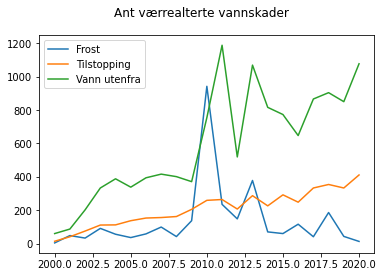

In [138]:
fig,ax = plt.subplots()
fig.suptitle('Ant værrealterte vannskader')
for i,j in enumerate(cols):
  ax.plot(år,dt[cols[i]],label=cols[i])
plt.legend()
plt.show()

In [140]:
dt.to_excel("output_test.xlsx")

# Beregne trend på nytt inkl skadeant

In [141]:
uploaded = files.upload()
#fno_værrelatert_vannskade_2000-2020.csv 


Saving fno_værrelatert_vannskade_2000-2020.csv to fno_værrelatert_vannskade_2000-2020.csv


In [148]:
kol = ['år','årsak','skade']
vær = pd.read_csv('fno_værrelatert_vannskade_2000-2020.csv',sep=',',skiprows=1,names=kol)
vær

,år,årsak,skade
0,2011.0,Vann utenfra,59054580.39
1,2010.0,Frost,55055198.93
2,2013.0,Vann utenfra,51088547.75
3,2014.0,Vann utenfra,39554984.31
4,2017.0,Vann utenfra,36335662.00
...,...,...,...
59,2000.0,Tilstopping,797647.00
60,2001.0,Tilstopping,638720.00
61,2000.0,Frost,182877.00
62,2020.0,Frost,148734.00


In [152]:
#summere skader
dtt = pd.DataFrame(columns=['Vann utenfra','Frost','Tilstopping'])
cols = ['Frost', 'Tilstopping','Vann utenfra']
år = np.arange(2000,2021,1)
for i in cols:
  årlig = []
  for j in år:
    df = vær.loc[(vær['årsak']==i) & (vær['år']==j)]['skade'].sum()
    årlig.append(df)
  #sum_list.append(årlig)
  dtt[str(i)] = årlig

In [ ]:
dtt

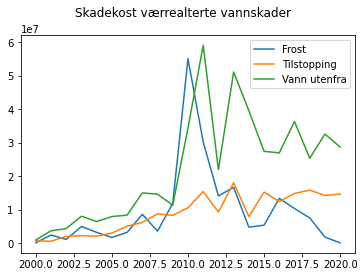

In [171]:
fig,ax = plt.subplots()
fig.suptitle('Skadekost værrealterte vannskader')
for i,j in enumerate(cols):
  ax.plot(år,dtt[cols[i]],label=cols[i])
plt.legend()
plt.show()

In [156]:
#lineær regresjon for å finne trend 
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance 
    between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

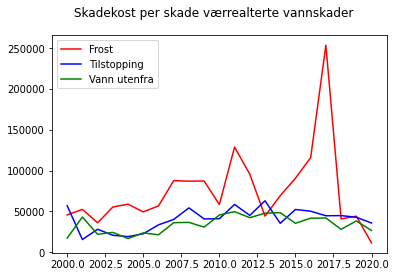

In [172]:
fig,ax = plt.subplots()
fig.suptitle('Skadekost per skade værrealterte vannskader')
colors = ['r','b','g']
for i,j in enumerate(cols):
  ax.plot(år,dtt[cols[i]]/dt[cols[i]],label=cols[i],color=colors[i])
  #ax.plot(år,trends[i],color=colors[i],label=cols[i])
plt.legend()
plt.show()

In [183]:
#trend 
skadekost = dtt/dt
trends = []
stigning = []
for i,j in enumerate(cols):
  a,b = linreg(range(len(skadekost[cols[i]])),skadekost[cols[i]])
  #a,b = linreg(range(len(skader)),skader)  #//x=skade
  trendline=[a*index + b for index in range(len(år))]
  trends.append(trendline)
  trend=round(a,0)
  stigning.append(trend)

In [184]:
stigning

[1990.0, 968.0, 784.0]

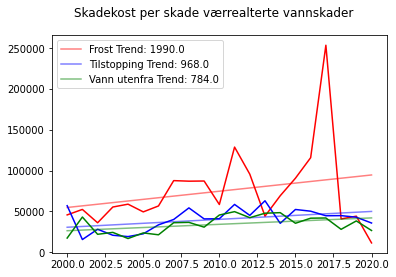

In [189]:
fig,ax = plt.subplots()
fig.suptitle('Skadekost per skade værrealterte vannskader')
colors = ['r','b','g']
for i,j in enumerate(cols):
  ax.plot(år,dtt[cols[i]]/dt[cols[i]],color=colors[i])
  ax.plot(år,trends[i],color=colors[i],alpha=0.5,
          label=str(cols[i])+' Trend: '+str(stigning[i]))
plt.legend()
plt.show()

In [ ]:
grønn = '#84BD00'
blå = '#60C3E6'
grå = '#6E6259'
blå1='#3396b9'
rød='#7f3035'
sjøgrønn='#004f59'

In [ ]:
trend